# Demonetization

Hello World !! This is my first Data Based Social Blog rather my first Blog   
I am writing this for few reasons, one I am seeing lot of articles on internet/newspapers/TV that we are going digital with respect to financial transactions, yes if it happens I will be the happiest person but I just wanted to see the real story based on actual numbers. Two, I wanted to explore my recently learned Python skills. Third, Fourth, Fifth and so on.. 


 <B> I will be mainly analysing NEFT and POS transactions data made available by RBI on onthly basis </B>

In this blog I will be using couple of Python Data Science Libraries. For non-technical folks (if I get any readers :-)) I would suggest to just read the inferences in the bottom of the charts. Chart heading shows what data is being plotted.

<B>Disclaimer</B>: I am not against any person or institution. I will be using publically available data published by RBI on NCPI website "https://rbi.org.in" and few news articles. All the calculations are rough in nature, so they have full right to be wrong. If you find any miscalculation, please do inform me, I would try to rectify it. I am using Python 2.7.

# Importing Libraries
We will be using these libraries in our Data Analysis. A Super Quick intro to these libs:

1. urllib/2 : This is used to scrape internet. You can probably use it for thousands of things over network but I will be using it to scrape RBI website and to programitically fetch the published data
2. Pandas : Boss of all Data Analysis Libs. It offers a relational Table like Data Structure called as Data Frame which is super cool to slice and dice and do much more than what we can do via SQL
3. numpy: Numerical Python - Muti dimensional Arrays, Vectors, Matrix, Statistics, Maths, Maths, Maths....
4. Matplolib : This is Tableau of python :) This is data visualisation library like Matlab. It is very versatile and allows you to play with all type of charts
5. DataTime: To hadle dates in python
6. OS: For normal OS (Windows in my case) related operations
7. BeautifuSoup: This is html parser which has lot of XML and HTML parsig commands handly

In [4]:
from urllib2 import urlopen,Request
from bs4 import BeautifulSoup
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime
import os

# Web Scraping

Below is a simple hack which I haven't used nor I would recommend you to use it. Actually RBI has blocked programmatic access to its website and hence we need to morph our make name from Python-Urllib to "Mozilla/5.0".
Since this is bit unethical to exploit this method, I would suggest you to go and fetch the excel files manually and store them all at one place. I am showing this option to teach you little bit of hacking :)

These statements will fetch the HTML page content which we will later pass through BeatifulSoup to parse it and fetch direct links to XLS files 

In [2]:
headers = { 'User-Agent' : 'Mozilla/5.0' }
req = Request('https://rbi.org.in/scripts/NEFTView.aspx', None, headers)
html = urlopen(req).read()

In [5]:
soup = BeautifulSoup(html,'html.parser')

Fetch all the tables in a Python <B>List</B>.

Later I am trying to show a Table Tag. Which is a HTML tag will all the xls and pdf files embedded

In [12]:
tables = soup.findAll('table')
print str(tables[0])[:500]

<table align="center" border="0" cellpadding="0" cellspacing="0" width="100%">
<table class="tablebg" width="100%"><tr><td class="tableheader" colspan="8"><b>April - 2017</b></td></tr><tr><td style="word-wrap:break-word;width:450;"><a class="link2" href="NEFTUserView.aspx?Id=108">Bankwise Volumes in ECS/NEFT/RTGS/Mobile Transactions - April 2017</a></td><td nowrap=""><a href="http://rbidocs.rbi.org.in/rdocs/NEFT/DOCs/RTGS04201749644FE0AB69404993C622C3B00F3901.XLS" target="_blank"><img align="abs


Now  if we again run the same command "FindAll" on this tag and search for tags "a", we will find absolute path of XLS we are looking for. Below is one sample to show

Later I have looped through this entire table tag and extracted the absoulte path for all XLS in a List

In [26]:
tables[0].findAll('a')[4]['href']

u'http://rbidocs.rbi.org.in/rdocs/NEFT/DOCs/RTGS05042017FDE4E175397742479736425CCA92BB3A.XLS'

In [27]:
links = []
for z in tables[0].findAll('a'):
    [links.append(z['href']) if z['href'].endswith('XLS') else None]

See here how 
1. I indexed a list to fetch first value
2. Replaced http with https
3.  Printed the URL for the first xls 

In [28]:
sample_link = links[0]
sample_link = sample_link.replace('http','https')
print sample_link

https://rbidocs.rbi.org.in/rdocs/NEFT/DOCs/RTGS04201749644FE0AB69404993C622C3B00F3901.XLS


### Do Not Run This
This is something which I am not going to execute nor would  recommend you to do. This will actuallt fetch the xls from NCPI website. I would recommend you to download the data files manually (which is leagally allowed).

What I am doing here:

1. Modifying the Header <B>Dict</B> to include more info on what to except in response
2. Fetch the content of URL in variabe : filex
3. Store filex as an XLS on my current working Directory

In [14]:
#hdr = {#I am puposefully removing the header info}
#req = Request(sample_link,headers=hdr)
#xls1 = urlopen(req)

#filex = open('xls1.xls','wb')
#filex.write(xls1.read())
#filex.close()

# Data Prepration

Here I will first pick up one of the xls downloaded to see the sheets/tabs available. Later I will parse one of the Tabs to see the content and then extract the content of the required Tab in a DataFrame. Lets see if I need to do some Data Munging to convert this raw data to usable format

In [13]:
xl = pd.ExcelFile('RTGS2712201660E74593E3F1499FAD16C14AEC8F29B1.XLS')
xl.sheet_names

[u'ECS', u'NEFT', u'RTGS', u'Mobile Banking']

## Lets Analyse NEFT first

Now is time for me decide What all I would include in my Analysis. Even before starting this work I had a thought of analysing NEFT and POS transactions because these are 2 major digital transaction catagories used by mass. Since I can see NEFT data available in this Sheet, I will parse it to see the data structure. POS data is hosted on a different RBI link, so I will run a saperate anlalysis for that.

To have a quick look at NEFT tab, I will prase it and do a head of that. Note that when I parse a sheet/tab in xls data is loaded in a <B>Pandas DataFrame</B>. I named it DF1 and then doing a head to see first 5 records.

In [15]:
df1 = xl.parse('NEFT')

In [16]:
df1.head(4)

,Unnamed: 0,NATIONAL ELECTRONIC FUND TRANSFER (NEFT) - NOVEMBER 2016,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Sr. No.,BANK,TOTAL OUTWARD DEBITS,NaN,RECEIVED INWARD CREDITS,NaN
1,NaN,NaN,NaN,NO. OF TRANSACTIONS,AMOUNT (Rs. Million),NO. OF TRANSACTIONS,AMOUNT (Rs. Million)
2,NaN,1,ABHYUDAYA CO-OP BANK LTD,54567,2730.17,122321,4179.03
3,NaN,2,ABU DHABI COMMERCIAL BANK,2787,2034.91,680,363.773


By Default, Parse will take first row as header But looking at the data I can see that Header is actually first 3 rows. 

Since pandas stores columns as an index, so it very easy to play with columns. 
We can create #hierarchical indices in pandas - for both row index and column index. Hierarchical index makes working with multilevel data really easy.

Let us now extract the specific tab/sheet from the xls using more sophisticated Pandas tools - We will use read_excel. Note how I am making a hierarchal index by using 3 rows as header. I am excluding 2 last rows as they contain Totals etc. which I am not interested to have in my data set.

#First I will quickly show how read_excel works and a high level view of Hierarchal Index


In [17]:
file = 'RTGS2712201660E74593E3F1499FAD16C14AEC8F29B1.XLS'
df_temp = pd.read_excel(file,sheetname='NEFT',header=[1,2,3],skip_footer=2)
df_temp.head(3)

NATIONAL ELECTRONIC FUND TRANSFER (NEFT) - NOVEMBER 2016  \
                                                     Sr. No.   
                                          Unnamed: 0_level_2   
NaN                                                  1         
NaN                                                  2         
NaN                                                  3         

                                                                               \
                               BANK TOTAL OUTWARD DEBITS                        
                 Unnamed: 1_level_2  NO. OF TRANSACTIONS AMOUNT (Rs. Million)   
NaN        ABHYUDAYA CO-OP BANK LTD                54567          2730.171553   
NaN       ABU DHABI COMMERCIAL BANK                 2787          2034.913361   
NaN  AHMEDABAD MERCANTILE COOP BANK                 4883           432.110315   

                                                  
    RECEIVED INWARD CREDITS                       
        NO. OF TRANSACTIONS AMOUNT (Rs. Million)  
NaN                  122321          4179.027111  
NaN                     680           363.773372  
NaN                   15176           830.842455

In the above DaatFrame, if you see the Index which is coming as NaN which is defined as "Not a Number" in pandas terms and is kind of equivelent to "NULL". 

Now we have 2 options here --> 
1. Use Pandas set_index function which I have used below
2. Create an iterable (list/array) of same length and create that as Index

We do have option of reading a column for eg 'Sr. No.' as index in read_excel method itself. Which would have been a bit tricky in this case due to Multilevel Column

In [85]:
_ = df_temp.set_index(df_temp.ix[:,df_temp.columns.get_level_values(1)=='Sr. No.'].values,inplace=True)
df_temp.head()

NATIONAL ELECTRONIC FUND TRANSFER (NEFT) - NOVEMBER 2016  \
                                                   Sr. No.   
                                        Unnamed: 0_level_2   
1                                                  1         
2                                                  2         
3                                                  3         
4                                                  4         
5                                                  5         

                                                           \
                                BANK TOTAL OUTWARD DEBITS   
                  Unnamed: 1_level_2  NO. OF TRANSACTIONS   
1           ABHYUDAYA CO-OP BANK LTD                54567   
2          ABU DHABI COMMERCIAL BANK                 2787   
3     AHMEDABAD MERCANTILE COOP BANK                 4883   
4       AIRTEL PAYMENTS BANK LIMITED                   19   
5  AKOLA DISTRICT CENTRAL CO-OP BANK                 6482   

                                                                     
                       RECEIVED INWARD CREDITS                       
  AMOUNT (Rs. Million)     NO. OF TRANSACTIONS AMOUNT (Rs. Million)  
1          2730.171553                  122321          4179.027111  
2          2034.913361                     680           363.773372  
3           432.110315                   15176           830.842455  
4             0.877849                      36             0.008893  
5           401.748515                    3837           125.596445

### Hierarchal Columns

Now to have a glimpse of hierarchical columns. First command shows us the column Index which is a MultiIndex created at 3 levels like this: 

levels = [[level0],[level1],[level2]]. Later I am showing you 3 levels separately

In [5]:
print df_temp.columns

MultiIndex(levels=[[u'NATIONAL ELECTRONIC FUND TRANSFER (NEFT) - NOVEMBER 2016'], [u'BANK', u'RECEIVED INWARD CREDITS', u'Sr. No.', u'TOTAL OUTWARD DEBITS'], [u'AMOUNT (Rs. Million)', u'NO. OF TRANSACTIONS', u'Unnamed: 0_level_2', u'Unnamed: 1_level_2']],
           labels=[[0, 0, 0, 0, 0, 0], [2, 0, 3, 3, 1, 1], [2, 3, 1, 0, 1, 0]])


In [8]:
print 'Level 1:',df_temp.columns.levels[0]
print 'Level 2:',df_temp.columns.levels[1]
print 'Level 3:',df_temp.columns.levels[2]

Level 1: Index([u'NATIONAL ELECTRONIC FUND TRANSFER (NEFT) - NOVEMBER 2016'], dtype='object')
Level 2: Index([u'BANK', u'RECEIVED INWARD CREDITS', u'Sr. No.',
       u'TOTAL OUTWARD DEBITS'],
      dtype='object')
Level 3: Index([u'AMOUNT (Rs. Million)',  u'NO. OF TRANSACTIONS',
         u'Unnamed: 0_level_2',   u'Unnamed: 1_level_2'],
      dtype='object')


## Get All Months in One DataFrame

Here I will iterate through all the XLS files we have at this location and merge all the DataFrames together. Note where we will be using concat function to stich the DataFrames on axis = 0, which is like "Union All" in case of SQL. 
I will also be changing 3 level columns to one level as we don't need hierarchial Index.

In [18]:
y = list()
for x in os.listdir(os.getcwd()):
    if x.endswith('XLS'):
        y.append(x)

Create a List of all the files that end with XLS at the current location. Later I am iterataing over this list and creating another list of DataFrames. Each data frame is the data loaded from NEFT tab of the XLS using the same commands we have seen earlier

In [19]:
df_list = list()
for file in y:
    try:
        df_list.append(pd.read_excel(file,sheetname='NEFT',header=[1,2,3],skip_footer=2,index=range(90)))
    except:
        print file

get_cols is a function being created to convert multilevel column to single level columns. Note the use of "Date" which will be understood better once you see the next function get_date_df. 

In function get_date_df, I will be extracting date from the header of each xls. See the head command above to see the level:0 of the columns. This is what I will be using to get the date of the xls. 

Since RBI publishes monthly data, we will be having each xls/now DataFrame in our case for one month. I have dowloaded data from Oct-2015 to complete the Analysis. 

Why Oct-2015 ? 
So that I can compare QoQ growth between 2016-Q3 and 2016-Q4 with QoQ growth between 2017-Q3 and 2017-Q4 with 

In [21]:
def get_cols(df):
    cols_list = list()
    for  x,y,z in df.columns.tolist():    
        if x.startswith('Date'):
            cols_list.append(' '.join(x.split()))
        else:
            if z.startswith('Un'):
                cols_list.append(' '.join(y.split()))
            else:
                cols_list.append(' '.join(y.split())+' '+' '.join(z.split()))
    return cols_list

In [22]:
def get_date_df(dfx):
    date_str = dfx.columns.values[0][0][dfx.columns.values[0][0].index('-')+2:]
    if date_str.index(' ') == 3:
        dfx['Date']=datetime.strptime(dfx.columns.values[0][0][dfx.columns.values[0][0].index('-')+2:],'%b %Y')
        dfx.columns = get_cols(dfx)
    else:
        dfx['Date']=datetime.strptime(dfx.columns.values[0][0][dfx.columns.values[0][0].index('-')+2:],'%B %Y')
        dfx.columns = get_cols(dfx)
    return dfx

Here I am doing the "Union All" part. I am stiching all the DataFrames in the list which I created 2 Steps back. I am calling the function created in above steps on each of DF (DataFrame) to 

1. Get the corresponding Date in Date Column
2. Convent Multilevel column to Single level column

In [23]:
for x,df in enumerate(df_list):
    if x == 0:
        master_df = get_date_df(df)       
    else:
        master_df = pd.concat([master_df,get_date_df(df)])        

## > master_df is the consolidated Data Set for Analysis

In [25]:
master_df.sample(3)

,Sr. No.,BANK,TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS NO. OF TRANSACTIONS,RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Date
NaN,157,UCO BANK,527404,36130.335146,1765721,56873.470988,2015-10-01
NaN,99,NAINITAL BANK LTD,17144,1266.926464,33937,2682.661663,2016-08-01
NaN,63,INDUSTRIAL AND COM BANK OF CHINA LT,150,87.292661,51,325.328915,2015-10-01


In [26]:
master_df.describe()

,Sr. No.,TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS NO. OF TRANSACTIONS,RECEIVED INWARD CREDITS AMOUNT (Rs. Million)
count,3120.000000,3.120000e+03,3.120000e+03,3.120000e+03,3.120000e+03
mean,87.234295,7.416333e+05,5.323895e+04,7.416333e+05,5.323895e+04
std,50.162071,2.490754e+06,1.738250e+05,2.386945e+06,1.680462e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,44.000000,3.426500e+03,3.620696e+02,3.835250e+03,4.438536e+02
50%,87.000000,1.283000e+04,1.415938e+03,1.916600e+04,1.816643e+03
75%,130.250000,3.092140e+05,2.702287e+04,2.978948e+05,2.892544e+04
max,184.000000,2.962411e+07,2.425620e+06,3.552038e+07,2.398490e+06


Describe is another very usable feature of Pandas DataFrames. It gives all the basic stats for numeric columns. 

Below is a glimpse of "where" clause or filtering in pandas DF. We can do multiple ways of filtering on rows and columns and multiple functions for that like - ix, iloc, loc or the Simple way I have explained below to filter on 
Aug-2016 data. 

Also note the column names now are much usable and simple. I have still not fixed my Index which I will do later when I would use it !!

In [27]:
master_df[master_df['Date']=='10/2016'].sample(4)

,Sr. No.,BANK,TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS NO. OF TRANSACTIONS,RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Date
NaN,94,MASHREQ BANK,304,184.291006,34,4.406208,2016-10-01
NaN,143,SUTEX COOP BANK,3427,231.691878,8598,509.008875,2016-10-01
NaN,154,THE KANGRA CENTRAL COOP BANK LTD,19555,749.628801,27303,1197.956404,2016-10-01
NaN,165,The Gadchiroli Dist Co-Op Bank,3366,73.319838,17822,379.678560,2016-10-01


## Analysis 1: MoM/QoQ Aggregated NEFT Transactions 

Here I would be aggregating (sum) of all NEFT transactions by value (Rs) on monthly basis. This is for all the banks hence all NEFT transactions in India in that month

In first step I am doing a groupby on Date(which is monthly in this case) and aggregating 2 required columns - 
            Total Debit Txns and Total Credit Txns
on monthly basis for all the banks and Results are loaded in a new DF named - grpd1

In second step, I am summing both of these columns and adding it as a new column in existing DF 

In third step I am calculating "% change". There is another very simple way to calculate "% change" using pct_change() function but I have preferred using shift command which works like "Lead/Lag" in SQL. pct_change and thousands of other functions in pandas and numpy makes our life simple

In [28]:
grpd1 = master_df.fillna(0).groupby('Date')\
            ['TOTAL OUTWARD DEBITS AMOUNT (Rs. Million)','RECEIVED INWARD CREDITS AMOUNT (Rs. Million)']\
                            .sum()

In [29]:
grpd1.head(2)

,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS AMOUNT (Rs. Million)
Date,,
2015-10-01,6.906880e+06,6.906880e+06
2015-11-01,6.370162e+06,6.370162e+06


Note that after doing groupby my Index has changed to DateTime.

In [30]:
grpd1['Total Credt + Debit'] = grpd1.sum(1)
grpd1.head(2)

,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Total Credt + Debit
Date,,,
2015-10-01,6.906880e+06,6.906880e+06,1.381376e+07
2015-11-01,6.370162e+06,6.370162e+06,1.274032e+07


In [31]:
grpd1['%change'] = \
    ((grpd1['Total Credt + Debit']-grpd1['Total Credt + Debit'].shift(1))/grpd1['Total Credt + Debit'].shift(1))*100
grpd1.head(3)

,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Total Credt + Debit,%change
Date,,,,
2015-10-01,6.906880e+06,6.906880e+06,1.381376e+07,NaN
2015-11-01,6.370162e+06,6.370162e+06,1.274032e+07,-7.770771
2015-12-01,8.197209e+06,8.197209e+06,1.639442e+07,28.681323


Just to show pct_change() functions easiness

In [32]:
grpd1_temp = grpd1.copy()
grpd1_temp['Total Credt + Debit'].pct_change()[:5]

Date
2015-10-01         NaN
2015-11-01   -0.077708
2015-12-01    0.286813
2016-01-01   -0.135468
2016-02-01    0.027072
Name: Total Credt + Debit, dtype: float64

Let me convert this DateTime Index to a Period Index which is similar to DateTime but are more flexible to work on

In [33]:
grpd2 = grpd1.to_period()
grpd2.head(2)

,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Total Credt + Debit,%change
Date,,,,
2015-10,6.906880e+06,6.906880e+06,1.381376e+07,NaN
2015-11,6.370162e+06,6.370162e+06,1.274032e+07,-7.770771


Now since I have the data ready let me plot 

1. MoM aggreated(Credit and Debit) Neft transaction
2. MoM % change in aggreated(Credit and Debit) Neft transaction

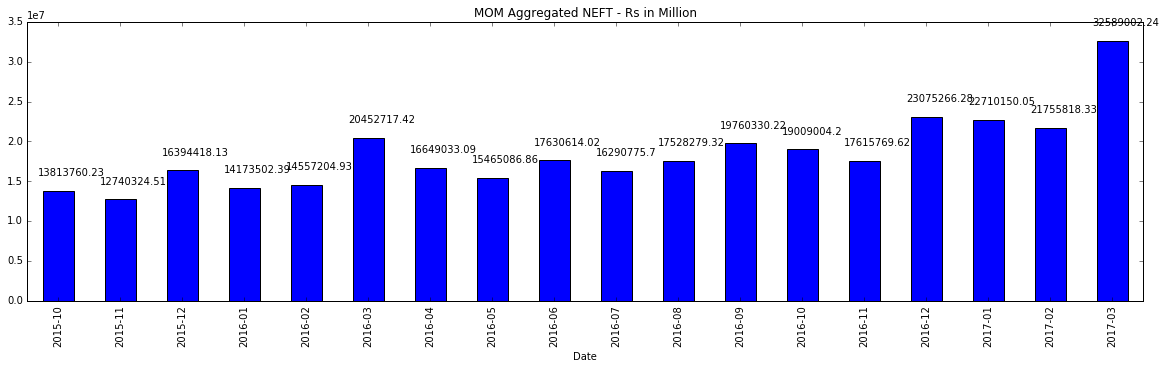

In [34]:
ax = grpd2['Total Credt + Debit'].plot(kind='bar',title='MOM Aggregated NEFT - Rs in Million',figsize=(20,5))

for idx, label in enumerate(list(grpd2.index)):         
    value = np.round(grpd2['Total Credt + Debit'].ix[idx],decimals=2)
    ax.annotate(value,(idx, value),xytext=(-20,15),textcoords='offset points')

### Inferences


>>- We can see a sudden spike in NEFT transactions after Nov 2016, which is an impact of demonetization
>>- Dec, Jan and Feb look flat, post a spike after Nov'16 
>>- March 2017 has get maximum NEFT transactions in last 15 months. Reasons: End of Financial year, Tax payments etc. But the change between Feb'16 - March'16 and Feb'17 - March'17 looks comparable. Let us see % changes to validate this understanding

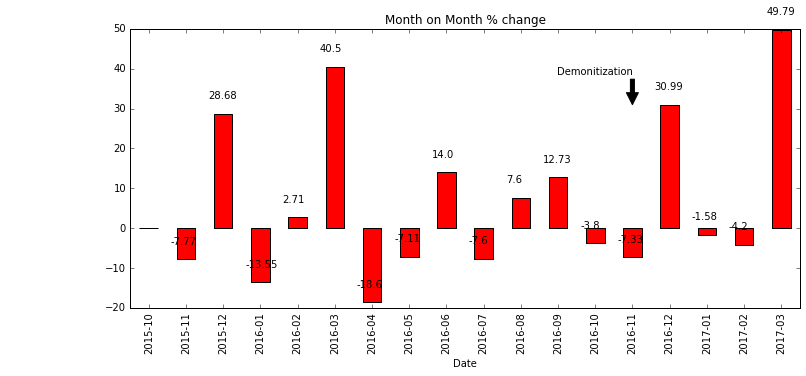

In [35]:
ax1 = grpd2['%change'].plot(kind='bar',title='Month on Month % change',figsize=(12,5),color='red')
for idx, label in enumerate(list(grpd2.index)):         
    value = np.round(grpd2['%change'].ix[idx],decimals=2)
    ax1.annotate(value,(idx, value),xytext=(-15,15),textcoords='offset points')

x_cord= 13
y_cord=grpd2.ix[pd.Period('12/2016',freq='M'),'%change']
ax1.annotate('Demonitization',xy=(x_cord,y_cord),
           xytext=(0,30),textcoords='offset points',arrowprops=dict(facecolor='black'),horizontalalignment='right')

### Inferences

>>- %Change beteen Oct-Nov 2017 is in same lines of Oct-Nov 2016 - No effect of demonitisation 
>>- %Change beteen Nov-Dec 2017 is in same lines of Nov-Dec 2016 - No effect of demonitisation 
>>- %Change beteen Dec-Jan 2017 is -2% which is much less when compared to Dec-Jan 2016 which was -14% - Possible effect of demonitisation
>>- Jan-Feb is more or less flat
>>- %Change in Feb-Mar is on the higher side when comapred to 2016 this might be due to cumulative effect(End of Fin year + Demonitisation). 

>>>Hence we can see a persistant change due to demonitisation. Lets have QoQ look to understand the impact better

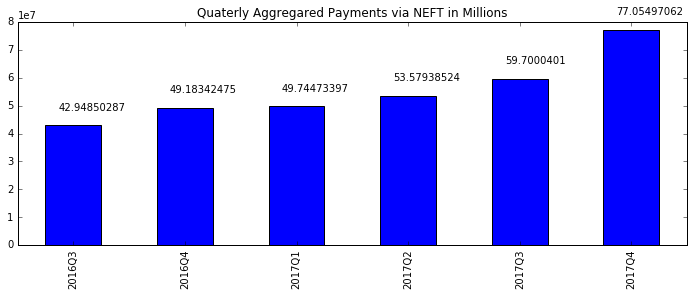

In [36]:
grpd3 = grpd2.resample('Q-MAR').sum()

ax = grpd3['Total Credt + Debit'].plot(kind='bar',title='Quaterly Aggregared Payments via NEFT in Millions',figsize=(12,4))
for idx, label in enumerate(list(grpd3.index)):         
    value = np.round(grpd3['Total Credt + Debit'].ix[idx],decimals=2)
    ax.annotate(value/1000000,(idx, value),xytext=(-15,15),textcoords='offset points')

See how easily we can resample (Up and Downsample) our TimeSeries data in Pandas. We can observe a spike in 2017Q4 which is huge and this is demonitisation effect. To understand how persistant the effect is, we need to onserve it for next 6 more months and do this analysis again. 

Below I will try to see %Change QoQ

In [15]:
grpd3['%change'] = ((grpd3['Total Credt + Debit']-grpd3['Total Credt + Debit'].shift(1))
                    /grpd3['Total Credt + Debit'].shift(1))*100

In [16]:
grpd3

,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Total Credt + Debit,%change
2016Q3,2.147425e+07,2.147425e+07,4.294850e+07,NaN
2016Q4,2.459171e+07,2.459171e+07,4.918342e+07,14.517204
2017Q1,2.487237e+07,2.487237e+07,4.974473e+07,1.141257
2017Q2,2.678969e+07,2.678969e+07,5.357939e+07,7.708658
2017Q3,2.985002e+07,2.985002e+07,5.970004e+07,11.423526
2017Q4,3.852748e+07,3.852749e+07,7.705497e+07,29.070216


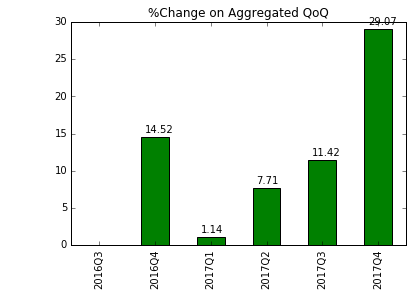

In [17]:
ax = grpd3['%change'].plot(kind='bar',color='green',title='%Change on Aggregated QoQ')

for x,y in enumerate(grpd3['%change'].values):
    ax.annotate(round(y,2),xy=(x,y),xytext=(-10,4),textcoords='offset points')

### Inference

>> Yes we see a +ve change in NEFT transactions, post demonitization, when compared to FY16. Lets keep a watch on how persistant the change is during next 1-2 Quarters</I>

## Analysis 2 : Get Scatter for Highest NEFT transactions

So what I will be doing next is to see what all banks are performing best in terms of NEFT transactions. Which shows that these banks are top contributers in overall NEFT transactions by volume and value. 

In [37]:
master_df.sample(3)

,Sr. No.,BANK,TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS NO. OF TRANSACTIONS,RECEIVED INWARD CREDITS AMOUNT (Rs. Million),Date
NaN,31,CATHOLIC SYRIAN BANK LTD.,140318,9065.082529,145707,9094.832508,2016-12-01
NaN,63,INDUSTRIAL AND COM BANK OF CHINA LT,171,21.680278,76,214.653665,2016-05-01
NaN,46,DHANLAXMI BANK LTD,117097,4667.791604,103445,5409.723190,2016-01-01


I will now set the Date column as my Index for further processing 

In [38]:
master_df2 = master_df.set_index('Date')

In [39]:
master_df2.head(2)

,Sr. No.,BANK,TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS NO. OF TRANSACTIONS,RECEIVED INWARD CREDITS AMOUNT (Rs. Million)
Date,,,,,,
2015-10-01,1,ABHYUDAYA CO-OP BANK LTD,32722,2059.047492,88693,3137.749554
2015-10-01,2,ABU DHABI COMMERCIAL BANK,2217,553.107943,620,962.400814


To get the top best performer banks in deigital Neft transactions, I would have to do same aggregation on Banks across all the months I have. Later we will drill down MoM if required

In [40]:
grpd11 = master_df2.groupby('BANK')
grpd12 = grpd11.sum()
grpd12.head(3)

,Sr. No.,TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS,TOTAL OUTWARD DEBITS AMOUNT (Rs. Million),RECEIVED INWARD CREDITS NO. OF TRANSACTIONS,RECEIVED INWARD CREDITS AMOUNT (Rs. Million)
BANK,,,,,
ABHYUDAYA CO-OP BANK LTD,18,833594,46052.736420,2067264,71887.286985
ABU DHABI COMMERCIAL BANK,36,43437,25764.748361,12276,12363.176441
AHMEDABAD MERCANTILE COOP BANK,54,112781,9143.555067,299445,18787.066448


Let me get the Total - Credit + Debit for Volume (Number of Transactions) and Value of Transactions

In [41]:
# To get Aggregated Value of Transactions 
grpd12['Total Credit + Debit Amt'] = grpd12['TOTAL OUTWARD DEBITS AMOUNT (Rs. Million)'] \
                    + grpd12['RECEIVED INWARD CREDITS AMOUNT (Rs. Million)']

# To get Aggregated Number of Transactions 
grpd12['Total Credit + Debit Txns'] = grpd12['TOTAL OUTWARD DEBITS NO. OF TRANSACTIONS'] \
                    + grpd12['RECEIVED INWARD CREDITS NO. OF TRANSACTIONS']

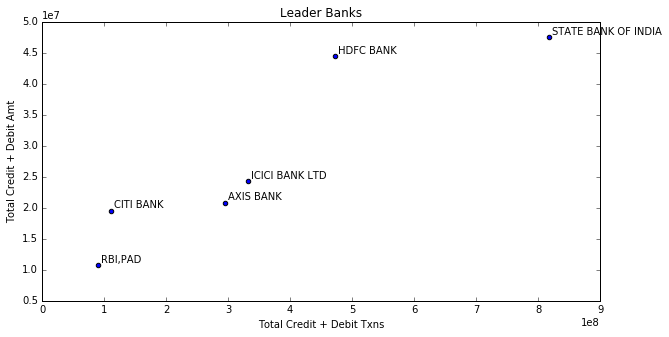

In [42]:
ax = grpd12.sort_values(by='Total Credit + Debit Amt',ascending=False).head(6)\
            .plot(kind='scatter',x='Total Credit + Debit Txns',y='Total Credit + Debit Amt',\
                              figsize=(10,5),title='Leader Banks')

grpd13 = grpd12.sort_values(by='Total Credit + Debit Amt',ascending=False)\
        [['Total Credit + Debit Amt','Total Credit + Debit Txns']].head(6)

for x,y in enumerate(grpd13.values):    
    ax.annotate(grpd13.index.values[x],xy=(y[1],y[0]),xytext=(3,3),textcoords='offset points')

### Inference 

>> So we see the <B>Leader Banks</B> here. SBI was excpected to be a leader in # of transaction due to its huge customer base but I wasn't expecting HDFC next to SBI in terms of Value and volume. ICICI and AXIS stay close. 

Let me now drill down and see the trsanctions value for SBI and HDFC to understand the pattern. For this I will first filter my DataFrame to have only SBI and HDFC records. For this I will create a new DataFrame named - sbi_hdfc and plot MoM Aggregated Value of NEFT Txns between these 2 banks

In [43]:
sbi_hdfc = master_df[(master_df['BANK']=='STATE BANK OF INDIA') | (master_df['BANK']=='HDFC BANK')].copy()

sbi_hdfc['Total Cr + Dr'] = sbi_hdfc['TOTAL OUTWARD DEBITS AMOUNT (Rs. Million)']\
                        +sbi_hdfc['RECEIVED INWARD CREDITS AMOUNT (Rs. Million)']

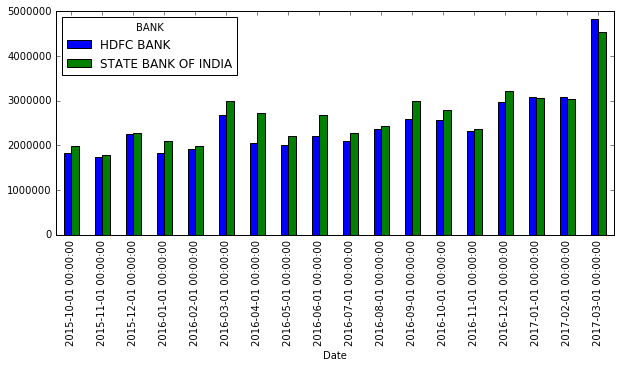

In [44]:
sbi_hdfc.pivot('Date','BANK','Total Cr + Dr').plot(kind='bar',figsize=(10,4))

### Inference:  

>> <B>Well this is bit of a Surprise !! HDFC has started leading SBI in terms of Aggregated Value of NEFT transactions after Jan'17. So if we talk about 2017 only, HDFC is the leader in terms of NEFT Txn Value. </B>

## Analysis 3: Mobile Banks - Let us see the MoM trend for Airtel Mobile Bank. I am expecting a spike post demonitisation !!

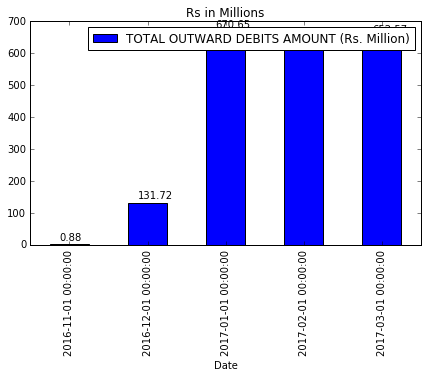

In [48]:
ax = master_df2[master_df2['BANK']=='AIRTEL PAYMENTS BANK LIMITED'][['TOTAL OUTWARD DEBITS AMOUNT (Rs. Million)']]\
                .sort_index().plot(kind='bar',figsize=(7,4),title='Rs in Millions')
    
for x,y in enumerate(master_df2[master_df2['BANK']=='AIRTEL PAYMENTS BANK LIMITED'][['TOTAL OUTWARD DEBITS AMOUNT (Rs. Million)']]\
                .sort_index().values):
    ax.annotate(round(y,2),xy=(x,y),xytext=(-10,4),textcoords='offset points')

### Inference : 

>>Yes as expected we are seeing monthly Debit transaction value for Airtel Mobile bank is shooting from less than a million to 600 million, post demonetisation 

## <a href="Card_Analysis.html" title="Card Analysis">Click here to see ATM and POS Analysis</a>